## Observations and Insights 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(study_results_df, mouse_metadata_df, how="left", on="Mouse ID")

# Display the data table for preview
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Check the number of mice.
study_data["Mouse ID"].nunique()
len(study_data)

1893

In [20]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
dup_mouse_ids = study_data.loc[study_data.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].nunique
dup_mouse_ids


<bound method IndexOpsMixin.nunique of 137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object>

In [21]:
# Drop any duplicate rows
#dup_mouse_data = study_data.loc[study_data['Mouse ID'] == 'g989']
#dup_mouse_data
#clean_mouse_data = study_data[study_data['Mouse ID'].isin(['g989']) == False]
clean_mouse_data = study_data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [22]:
# Recheck the number of mice
clean_mouse_data["Mouse ID"].nunique()

249

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

#Group by each drug regimen
drug_regimen = clean_mouse_data.groupby(['Drug Regimen'])

#create each variable
mean = drug_regimen.mean()['Tumor Volume (mm3)']
median = drug_regimen.median()['Tumor Volume (mm3)']
var = drug_regimen.var()['Tumor Volume (mm3)']
std_dev = drug_regimen.std()['Tumor Volume (mm3)']
sems = drug_regimen.sem()['Tumor Volume (mm3)']

#summary table
summary_table = pd.DataFrame({"Mean Tumor Volume": mean,
                              "Median Tumor Volume": median,
                              "Tumor Volume Variance": var,
                              "Tumor Volume Std. Dev.": std_dev,
                              "Tumor Volume Std. Error": sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
#summary table v2
summary_table = drug_regimen.agg({'Tumor Volume (mm3)':["mean","median", "var", "std", "sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

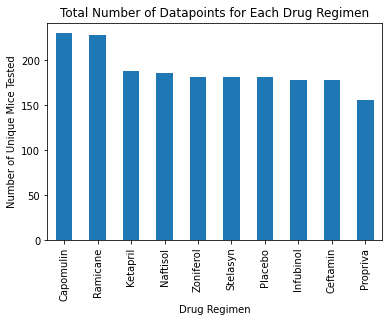

In [25]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

count = clean_mouse_data['Drug Regimen'].value_counts()
count.plot(kind="bar", title = "Total Number of Datapoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

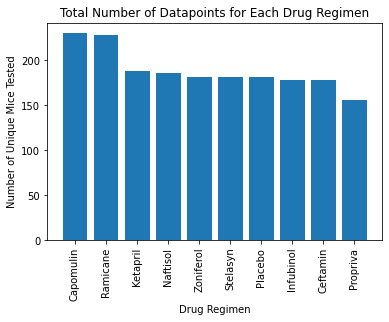

In [26]:
# Generate identical bar plot using pyplot instead of pandas.
count = clean_mouse_data['Drug Regimen'].value_counts()
plt.bar(count.index.values, count.values)
plt.xlabel("Drug Regimen")
plt.title("Total Number of Datapoints for Each Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Unique Mice Tested")
plt.show()


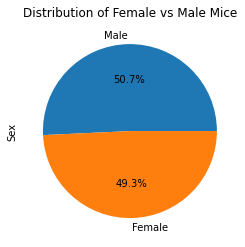

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count = clean_mouse_data['Sex'].value_counts()
count.plot(kind="pie", autopct='%1.1f%%', title = "Distribution of Female vs Male Mice")
#count.get_legend().set_bbox_to_anchor((1,1))
plt.show()

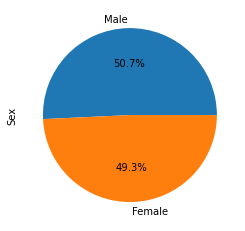

In [28]:
# Generate identical pie plot using pyplot
count = clean_mouse_data['Sex'].value_counts()
plt.pie(count.values, labels=count.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
#plt.title = ("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max()
max_time = max_time.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_time.merge(clean_mouse_data, on=['Mouse ID', 'Timepoint'], how="left")

Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [35]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s outliers: {outliers}")
    

Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


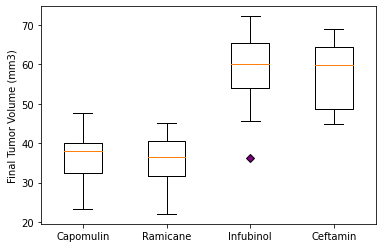

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
outlier_format = dict(markerfacecolor = 'purple', marker='D', markeredgecolor='black')
plt.boxplot(tumor_vol_data, labels = treatments, flierprops = outlier_format)
plt.title = ("Box Plot of the Final Tumor Volume of each Mouse")
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

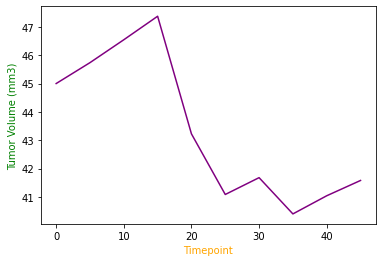

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

#single mouse data drill down
capomulin_data = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == "Capomulin"]
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == "r944"]

#line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color = "purple" )
#plt.title = ("Tumor Volume vs. Time Point for Mouse r944")
plt.xlabel("Timepoint", color = "orange")
plt.ylabel("Tumor Volume (mm3)", color = "green")
plt.show()

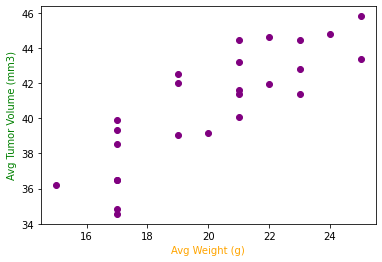

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen

avg_capomulin = capomulin_data.groupby(['Mouse ID']).mean()

#double chk the ordering of this plt
plt.scatter(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'], color = "purple")
plt.xlabel("Avg Weight (g)", color = "orange")
plt.ylabel("Avg Tumor Volume (mm3)", color = "green")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


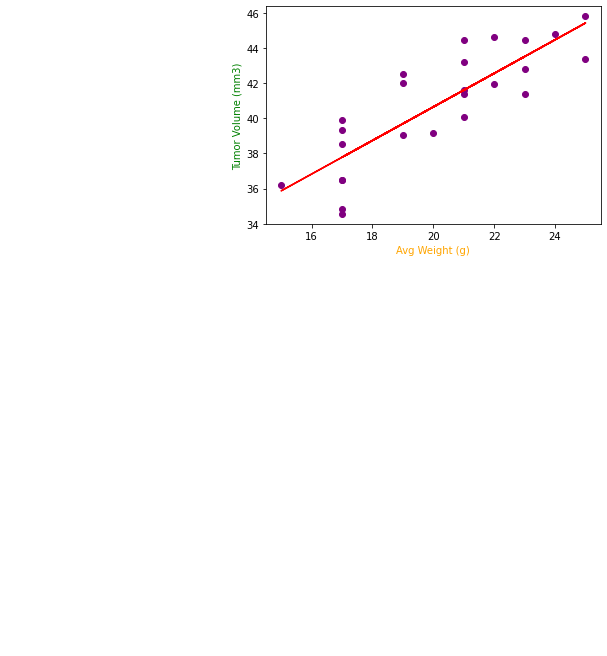

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'], color = "purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Avg Weight (g)", color = "orange")
plt.ylabel("Tumor Volume (mm3)", color = "green")
plt.show()

# Observations and Insights